<a href="https://colab.research.google.com/github/BureddySaiPoojitha/Module3_All_Labs_AIML_-/blob/main/MODULE_3_LAB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **# MODULE 3 : CLASSIFICATION-1**


LAB-1 : Understanding Distance metrics and Introduction to KNN

# SECTION -1 : DISTANCE METRICS

In [76]:
import numpy as np
import pandas as pd
import math
from scipy.spatial import distance
import matplotlib.pyplot as plt

In [77]:
x_1=np.array((2,4))
x_2=np.array((10,12))
sumv=0
for i in range(len(x_1)):
  sumv=sumv+(x_1[i]-x_2[i])**2
print(math.sqrt(sumv))
euclidean_dist=np.sqrt(np.sum((x_1-x_2)**2))
print(euclidean_dist)


11.313708498984761
11.313708498984761


In [78]:
print(distance.euclidean(x_1,x_2))

11.313708498984761


In [79]:
plotx=np.linspace(-10,10,50)
meshx,meshy=np.meshgrid(plotx,plotx)
tempeuclid=np.sqrt((meshx**2)+(meshy**2))
tempmanhat=np.abs(meshx)+np.abs(meshy)

In [80]:
import plotly.graph_objects as go
fig=go.Figure(data=[go.Surface(z=tempeuclid,x=plotx,y=plotx)])
fig.update_layout(title='Euclidean Distance',scene=dict(xaxis_title='x',yaxis_title='y',zaxis_title='z'))
fig.show()

**Manhattan** **Distance**

In [81]:
manhatdist=distance.cityblock(x_1,x_2)
print(manhatdist)

16


In [82]:
# Task -2

manhatdist=np.sum(np.abs(x_1-x_2))
print(manhatdist)

16


In [83]:
# 3D

plotx=np.linspace(-10,10,50)
meshy=np.linspace(-10,10,50)
meshz=np.linspace(-10,10,50)
tempmanhat=np.abs(meshx)+np.abs(meshy)+np.abs(meshz)

In [84]:
import plotly.graph_objects as go
fig=go.Figure(data=[go.Surface(z=tempmanhat,x=plotx,y=plotx)])
fig.update_layout(title='Manhattan Distance',scene=dict(xaxis_title='x',yaxis_title='y',zaxis_title='z'))
fig.show()

**Minkowski Distance**

In [85]:
minkowski_dist=distance.minkowski(x_1,x_2,p=5)
print(minkowski_dist)

9.18958683997628


In [86]:
minkowski_dist=distance.minkowski(x_1,x_2,p=9)
print("Minkowski distance when p=9 is ",minkowski_dist)
minkowski_dist=distance.minkowski(x_1,x_2,p=10)
print("Minkowski distance when p=10 is ",minkowski_dist)

Minkowski distance when p=9 is  8.640477911138449
Minkowski distance when p=10 is  8.574187700290347


**Hamming Distance**

In [87]:
str_1 = 'euclidean'
str_2 = 'manhattan'
hamming_dist = distance.hamming(list(str_1), list(str_2)) * len(str_1)
print(hamming_dist)

7.0


**Cosine Similarity**

In [88]:
from numpy.linalg import norm
cosine_similarity = 1 - distance.cosine(x_1,x_2)
print(cosine_similarity)

cosine_similarity = np.dot(x_1, x_2)/(norm(x_1)*norm(x_2))
print(cosine_similarity)

0.973417168333576
0.973417168333576


**Chebyshev Distance**

In [89]:
chebyshev_dist = distance.chebyshev(x_1,x_2)
print(chebyshev_dist)

8


**Jaccard** **Distance**

In [90]:
print(distance.jaccard([1,1,0],[0,0,1]))
print(distance.jaccard([1,1,0],[1,1,0]))
print(distance.jaccard([1,1,0],[1,0,0]))

1.0
0.0
0.5


In [91]:
def jaccard_similarity(a,b):
  c=a.intersection(b)
  return float(len(c)) / (len(a) + len(b) - len(c))
list1=['lion','tiger','fox','wolf']
list2=['lion','tiger','fox']
words1=set(list1)
words2=set(list2)
print("Jaccard similarity is : ",jaccard_similarity(words1,words2))
print("Jaccard distance is : ",1-jaccard_similarity(words1,words2))

Jaccard similarity is :  0.75
Jaccard distance is :  0.25


**Haversine distance**

In [92]:
def haversine(coord1, coord2):
    lon1, lat1 = coord1
    lon2, lat2 = coord2

    R = 6371000
    phi_1 = math.radians(lat1)
    phi_2 = math.radians(lat2)

    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = math.sin(delta_phi / 2.0) ** 2 + math.cos(phi_1) * math.cos(phi_2) * math.sin(delta_lambda / 2.0) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    meters = R * c
    km = meters / 1000.0
    meters = round(meters, 3)
    km = round(km, 3)
    print(f"Distance: " + str(km) + " km")


In [93]:
haversine([-0.535354,68.863995],[-32.903734,26.897492])

Distance: 5124.592 km


# **Section -2 : KNN**

# Section - 2.1 : KNN on a synthetic dataset

In [94]:
import random
import scipy.stats as ss
from sklearn.neighbors import KNeighborsClassifier

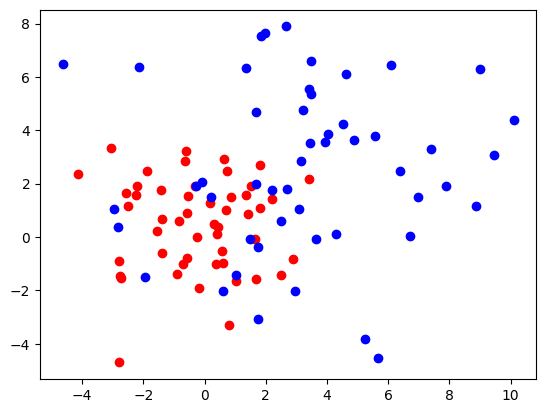

In [95]:
def generate_synth_data(n = 50):
    points = np.concatenate((ss.norm(0, 2).rvs((n, 5)), ss.norm(3, 3).rvs((n, 5))), axis = 0)
    outcomes = np.concatenate((np.repeat(0, n), np.repeat(1, n)))
    return (points, outcomes)

n = 50
pts,tgts = generate_synth_data(n)
plt.figure()
plt.plot(pts[:n, 0], pts[:n, 1], "ro")
plt.plot(pts[n:, 0], pts[n:, 1], "bo")
plt.show()

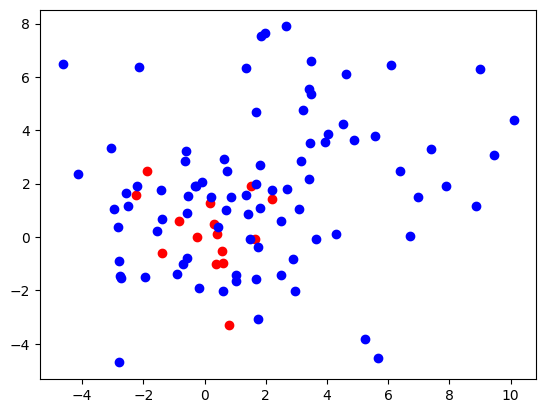

In [96]:
n=15
test_pts,test_tgts=generate_synth_data(n)
plt.figure()
plt.plot(pts[:n, 0], pts[:n, 1], "ro")
plt.plot(pts[n:, 0], pts[n:, 1], "bo")
plt.show()

In [97]:
# Task-3

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(pts,tgts)
our_preds=knn.predict(test_pts)
print("Prediction Accuracy : ",(100*np.mean(our_preds==test_tgts)))
print(our_preds)

Prediction Accuracy :  90.0
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0]


# Section 2.2 - KNN on a Real Worlld dataset

In [98]:
from sklearn.datasets import load_iris
iris=load_iris()
data=pd.DataFrame(iris.data,columns=iris.feature_names)
data['target']=pd.Series(iris.target)
data.head(15)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [99]:
np.random.seed(123)
indices = np.random.permutation(data.shape[0])
div = int(0.76 * len(indices))
train_idx, test_idx = indices[:div], indices[div:]

train_set, test_set = data.loc[train_idx,:], data.loc[test_idx,:]
test_class = list(test_set.iloc[:,-1])
train_class = list(train_set.iloc[:,-1])

In [100]:
def dist_euclidean(x,y):
  return distance.euclidean(x,y)

def dist_cosine(x,y):
  return distance.cosine(x,y)

def dist_manhattan(x,y):
  return distance.cityblock(x,y)

def dist_chebyshev(x,y):
  return distance.chebyshev(x,y)

In [101]:
metrics_list=[dist_euclidean,dist_cosine,dist_manhattan,dist_chebyshev]
for dist in metrics_list:
  knn=KNeighborsClassifier(n_neighbors=3,metric=dist)
  knn.fit(train_set.iloc[:,:-1],train_class)
  our_preds=knn.predict(test_set.iloc[:,:-1])
  print("Prediction Accuracy : ")
  print(100*np.mean(our_preds==test_class))
  print()

Prediction Accuracy : 
94.44444444444444

Prediction Accuracy : 
94.44444444444444

Prediction Accuracy : 
94.44444444444444

Prediction Accuracy : 
94.44444444444444



**QUESTIONS**

1.  How are similarity and distance different from each other?

Similarity measures how alike two data points are, typically ranging from 0 to 1, with examples including cosine similarity, which assesses the angle between vectors, and Jaccard similarity, which evaluates the intersection over the union of two sets. Distance, on the other hand, measures how far apart two data points are using non-negative numbers, with examples such as Euclidean distance, the straight-line measure between points, and Manhattan distance, the sum of absolute differences in Cartesian coordinates.

2.  Are there any conditions for a particular distance to be considered a "distance metric"?

A distance metric must satisfy four key properties: **Non-negativity**, ensuring distances are always zero or positive; **Identity of Indiscernibles**, where distance is zero only if two points are identical; **Symmetry**, meaning the distance from \(x\) to \(y\) equals the distance from \(y\) to \(x\); and the **Triangle Inequality**, which ensures the direct distance between two points is never greater than the sum of distances via a third point. These conditions maintain logical and consistent behavior in metric spaces.